In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_5_ode_systems.ipynb")

# Predator-prey iterative functions

Continuing on from lec_act_5_predator_prey - we're going to add the compute n time steps and plotting

Slides for the lab: https://docs.google.com/presentation/d/1wd1SpTJiezfroDizaFkA6UxCgMQE_A4ZKCyJoNfa0cM/edit?usp=sharing

In [2]:
# Doing the imports for you - notice scipy. You may need to install this library
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
import ipywidgets as ipw

# Copy functions over

TODO 1: Copy your three functions from lec_act_4_systems to here (compute_x_from_prey_predator and compute_one_time_step). 

In [3]:
# compute_prey_from_prey_and_predator
def compute_prey_from_prey_and_predator(prey , predator, params):
    # TODO: Calculate the new prey value from the input prey/predator values and delta t (see equation in the cell above)
    #  Note: To get, eg, the "Prey reproduce" value use params["Prey reproduce"].
  
    dprey_dt = params["Prey reproduce"] * prey - params["Prey eaten"] * prey * predator
    new_prey = prey + dprey_dt * params["delta t"]

    return new_prey
    pass

In [4]:
# compute_predator_from_prey_and_predator
def compute_predator_from_prey_and_predator(prey , predator, params):
    # TODO: Calculate the new predator value from the input prey/predator values and delta t (see equation)
    #  Note: To get, eg, the "Prey reproduce" value use params["Prey reproduce"].

    dpredattor_dt = -params["Predator loss"] * predator + params["Predator reproduce"] * prey * predator
    new_predator = predator +delta_t * dpredattor_dt
    return new_predator
    pass


In [5]:
# compute_one_time_step
def compute_one_time_step(prey, predator, params):
    # TODO: Calculate the new prey/predator values from the input prey/predator values and delta t (see equation)
    # Do NOT re-write the equations - call the functions you already wrote
    new_prey = compute_prey_from_prey_and_predator(prey, predator, params)
    new_predator = compute_predator_from_prey_and_predator(prey, predator, params)
    return new_prey, new_predator
    pass

In [6]:
# Check code
delta_t = 0.1
n_days = 40
n_time_steps = int(n_days / delta_t)
params = {"Prey reproduce":1.0,
          "Prey eaten":0.02,
          "Predator loss":1.2,
          "Predator reproduce":0.03,
          "delta t": delta_t,   # unit: days
          "n days": n_days,     # unit: days
          "n time steps": n_time_steps}

prey_initial = 100
predator_initial = 100

prey_new, predator_new = compute_one_time_step(prey_initial, predator_initial, params)

print(f"Checking prey new {prey_new}, should be 90 predator new {predator_new}, should be 118")

Checking prey new 90.0, should be 90 predator new 118.0, should be 118


In [7]:
grader.check("copy_correct")

copy_correct results: All test cases passed!

# Iterate n times

Write a function that uses your **compute_one_time_step** to calculate how the prey and predator values change over time.

In [8]:
# EXAMPLE CODE
# Computing and storing values for an iterative system. 
# Equation: x_i+1 = x_i + dx

start_x = 0
dx = 0.1
n_timesteps_example = 10

# Place to put the data
keep_values = np.zeros((n_timesteps_example,))

cur_x = start_x  # you don't really have to do this, but the code looks "cleaner" this way (and you don't override the start value)
for i in range(0, n_timesteps_example):
    # This will put the starting value in the first column
    keep_values[i] = cur_x

    # Now update x - 
    #  the one on the left is the value at the next time step, the one on the right is the current time step
    next_x = cur_x + dx

    # Now make sure that cur_x has the new value for the next loop
    cur_x = next_x

print(keep_values)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [9]:
# Note that you could use either the number of time steps OR total time for the last parameter
#  Timesteps is a bit safer because at least you know it will only go for so many time steps...
def calculate_n_time_steps(prey_initial, predator_initial, params):
    """ Call compute one time step multiple times and store it in a numpy array
    @param prey - the starting prey value (number)
    @param predator - the ending predator value (number)
    @param params - the four parameters of the Lotka-Volterra system, plus delta t and time step, in a dictionary
    @return prey, predator values as a 2xtimesteps numpy array
    """
    # TODO:
    #   Allocate a 2xn time steps numpy array to put the data in
    #   Set the first element of that data to the initial prey/predator values
    #   for the remaining values
    #     Calculate the next from the previous
    #     Store the next values in the array
    #   return the array

    n_timesteps = params["n time steps"]
    data = np.zeros((2, n_timesteps))
    data[0, 0] = prey_initial
    data[1, 0] = predator_initial
    for i in range(1, n_timesteps):
        data[0, i], data[1, i] = compute_one_time_step(data[0, i-1], data[1, i-1], params)
    return data
    pass


In [10]:
# Note that you could use either the number of time steps OR total time for the last parameter
#  Timesteps is a bit safer because at least you know it will only go for so many time steps...
def calculate_n_time_steps(prey_initial, predator_initial, params):
    """ Call compute one time step multiple times and store it in a numpy array
    @param prey - the starting prey value (number)
    @param predator - the ending predator value (number)
    @param params - the four parameters of the Lotka-Volterra system, plus delta t and time step, in a dictionary
    @return prey, predator values as a 2xtimesteps numpy array
    """
    # TODO:
    #   Allocate a 2xn time steps numpy array to put the data in
    #   Set the first element of that data to the initial prey/predator values
    #   for the remaining values
    #     Calculate the next from the previous
    #     Store the next values in the array
    #   return the array

    n_time_steps = params["n time steps"]
    current_prey = prey_initial
    current_pred = predator_initial
    prey = np.zeros((n_time_steps,))
    pred = np.zeros((n_time_steps,))

    for i in range(0, n_time_steps):
        prey[i] = current_prey
        pred[i] = current_pred
        prey_new, predator_new = compute_one_time_step(current_prey, current_pred, params)
        current_prey = prey_new
        current_pred = predator_new


    output = np.vstack((prey,pred))
    return(output)


In [11]:
new_populations_check = calculate_n_time_steps(prey_initial=prey_initial, predator_initial=predator_initial, params=params)

print(f"Shape of new_populations_check should be 2 x {params['n time steps']}, is {new_populations_check.shape}")

print(f"Last time step should be [-1.10352058e-04  2.17613504e-01], is {new_populations_check[:, -1]}")


Shape of new_populations_check should be 2 x 400, is (2, 400)
Last time step should be [-1.10352058e-04  2.17613504e-01], is [-1.10352058e-04  2.17613504e-01]


In [12]:
grader.check("compute_n_time_steps")

compute_n_time_steps results: All test cases passed!

<!-- BEGIN QUESTION -->

# Plot the predator/prey results (Euler)


In [13]:
# Plot the prey and predator cycles. 
def plot_results(axs, prey_pred_values, params):
    """ plot the results of running the system
    @param axs - the axes to plot in
    @param prey_pred_values - x y values in a 2xn numpy array
    @param params - the four parameters of the Lotka-Volterra system, plus delta t and time step
    @return Nothing
    """

    ts = np.linspace(0, params["delta t"] * params["n time steps"], params["n time steps"])
    axs.plot(ts, prey_pred_values[0, :], '-k', label="Prey")
    axs.plot(ts, prey_pred_values[1, :], ':g', label="Predator")
    
    axs.set_xlabel('Days')
    axs.set_ylabel('Population')

    axs.set_title(f"d prey = {params['Prey reproduce']} x - {params['Prey eaten']} x y\nd pred = {-params['Predator loss']} y + {params['Predator reproduce']} x y")
    axs.legend()

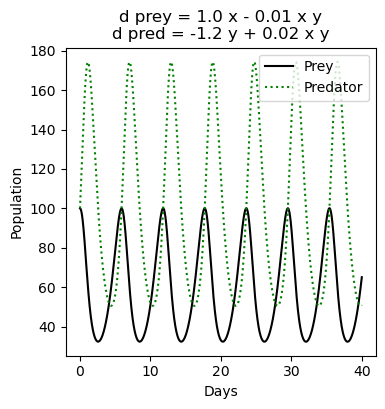

In [14]:
# TODO - notice that the number of prey/predators is creeping up - this is because Euler integration is not
#. very accurate.
# TODO Try changing delta_t - if you make it smaller, what happens to the creep? What if you make it bigger?
delta_t = 0.0001
n_days = 40
n_time_steps = int(n_days / delta_t)
params_full = {"Prey reproduce":1.0,
          "Prey eaten":0.01,
          "Predator loss":1.2,
          "Predator reproduce":0.02,
          "delta t": delta_t,   # day
          "n days": n_days,     # unit: days
          "n time steps":n_time_steps}

new_populations_full = calculate_n_time_steps(prey_initial=prey_initial, predator_initial=predator_initial, params=params_full)

nrows = 1
ncols = 1
_, axs = plt.subplots(nrows, ncols, figsize=(4, 4))

plot_results(axs, new_populations_full, params_full)


In [15]:
# Manual grade
with smaller dlta_t sizes the system both variables would grow with time. with a finer resolution, the plot looked identical to the one for the ode solution.
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

# Using the ODE solver

TODO: look over the instructions here first: https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html

This is an example of how generalization makes things a bit confusing - the function passed TO the ode solver to calculate the derivitive is defined by
- what the current input value is. Because the ode solver can work in any dimension, this is a numpy array. In our case, we only have two dimensions. But it's up to us to "unpack" the numpy array into our variables
- the current time with which to calculate the derivative. For example, if dx/dt = t * x + 3, then this would be the t. In our case, the derivatives do NOT depend on t, just prey/predator values, so we can ignore t
- one (or more) parameters specified by YOU, the caller. This is how you get "arbitrary" values into your function...

In the example in the link above, they pass in each "user" parameter (alpha, beta, delta, gamma) as an individual paramter, using the args = () mechanism. We are just going to pass all of our parameters in as a dictionary, as we did above. Note that this is (somewhat) slower because of doing the key/value extraction every call

- The derivative function should return a numpy array of the same dimension as the input array

Optional: use the args=(a,b,g,d) approach instead.

TODO: Fill in the predator_prey_derivative function

In [16]:
def predator_prey_derivative(prey_predator, t, params):
    """ Slightly modified version of the derivative function from the scipy example
    @param prey_predator is current prey and predator as a tuple (X in the example above)
    @param t is ignored/not used in the predator/prey derivative - but if dx/dt DID depend on t, then here it is
    @param params - our params from before (instead of alpha, beta, delta, gamma) """
    prey, predator = prey_predator   # Cute trick to get x and y out of the tuple

    # TODO dprey_dt should be dprey_dt from your compute_prey_from_prey_and_predator (no multiplication by dt)
    #  Note: The t in the input equation is t, NOT dt - so do NOT use it in your equation
    # params["Prey reproduce"] will be the same as in the previous bit of code
    dprey_dt = params["Prey reproduce"] * prey - params["Prey eaten"] * prey * predator
    dpredator_dt = -params["Predator loss"] * predator + params["Predator reproduce"] * prey * predator

    
    # Stitch back together into a numpy array
    return np.array([dprey_dt, dpredator_dt])

In [17]:
# Check the function works
# Huh, what's with the _? This is Python syntax for: There's a variable, but I don't care what value it is
derivs = predator_prey_derivative(np.array([prey_initial, predator_initial]), _, params_full)

print(f"Derivative result is {derivs}, should be [ 0. 80.]")

Derivative result is [ 0. 80.], should be [ 0. 80.]


In [18]:
grader.check("ode_solver_deriv_fc")

ode_solver_deriv_fc results: All test cases passed!

# Call the ODE solver and plot the results

If your function is correct then this will just work.

TODO: Try doing args=(params, 3) instead of what's there; what kind of error do you get? Why? Can you change the derivative function to "fix" it?

TODO: Take out the transpose. What error do you get? Why?

In [19]:
# Now do plot results with the ode solver

#  Notice that we turn the input into a numpy array - ode can operate on any numpy array of any dimension...
prey_predator_initial = np.array([prey_initial, predator_initial])

# The ode solver will return the prey/predator values at these time values
#   Note that the ode solver will do the integration between those time steps...
ts = np.linspace(0.0, params_full["n days"], params_full["n time steps"])

In [20]:
# Crazy python parameter passing
#  First argument is a function that takes in x,y and returns dx/dt and dy/dt
#  Second argument is the t values to calculate for
#  Third argument is an (optional) list of parameters - could be more than one - that get passed to the
#    list of parameters following X, t in predator_prey_derivative
#  Yes, this is terribly confusing, and can cause a lot of errors that are challenging to debug
#   Python quirks - args needs to be a tuple. To make a tuple with one element, add a comma
# TODO: Try adding another parameter to the tuple - what error do you get and why?
#.TODO: Try passing in prey_initial, predator_intial instead of prey_predator_initial - what kind of error do you get?
new_populations_ode = integrate.odeint(predator_prey_derivative, prey_predator_initial, ts, args=(params_full, ))
to_do = integrate.odeint(predator_prey_derivative, prey_predator_initial, ts, args=(params_full, 12 ))
second_todo = integrate.odeint(predator_prey_derivative, prey_initial, predator_initial, ts, args=(params_full, ))

print(f"Last value is {new_populations_ode[-1]}, should be [65.2xxx 51.0xxx]")

TypeError: predator_prey_derivative() takes 3 positional arguments but 4 were given

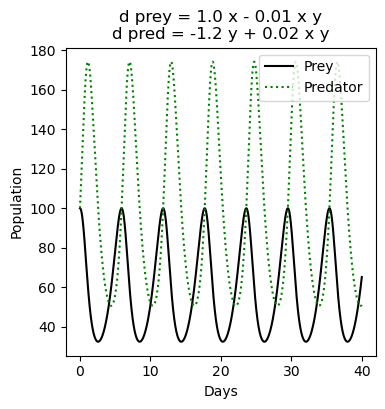

In [ ]:
nrows = 1
ncols = 1
_, axs = plt.subplots(nrows, ncols, figsize=(4, 4))

# Why is this a transpose? Because ode outputs as an n_time_steps X 2 array
plot_results(axs, np.transpose(new_populations_ode), params_full)

In [ ]:
# Manual grade
print("This plot is also manually graded. See rubric and slides for more information on expected output.")

This plot is also manually graded. See rubric and slides for more information on expected output.


In [ ]:
grader.check("plot_ode_solver")

plot_ode_solver results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"none"}
# Approximate number of hours, including lab/in-class time
hours = 1.5

In [ ]:
grader.check("hours_collaborators")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Lab 4: Iterative Systems

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)